In [1]:
from firedrake import *
import matplotlib.pyplot as plt

# 1D BVP

In [16]:
mesh = IntervalMesh(5, 1)
x = SpatialCoordinate(mesh)

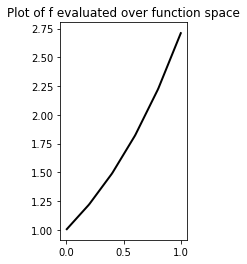

In [17]:
V = FunctionSpace(mesh, "CG", 1)
u = TrialFunction(V)
v = TestFunction(V)

a = Constant(5)
expr = (a - x[0])**2


f = Function(V)
# f.project(exp(x[0]))
f.interpolate(exp(x[0]))
fig, axes = plt.subplots()
axes.set_title('Plot of f evaluated over function space')
plot(f, axes=axes)
axes.set_aspect("equal")
plt.show()

In [18]:
bc = DirichletBC(V, 0., [1, 2])

In [19]:
a = inner(grad(u), grad(v)) * dx
L = f * v * dx

In [20]:
A = assemble(a, bcs=bc)
b = assemble(L)
bc.apply(b)

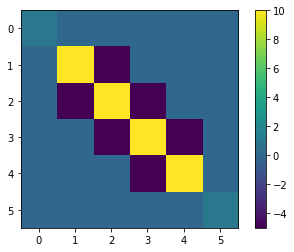

In [21]:
# Printing the stiffness matrix entries and plotting
A_entries = A.M.values
plt.imshow(A_entries)
plt.colorbar()
plt.show()

In [22]:
# Solving the resultant linear problem Au = b
u = Function(V)  # Declaring the unknown as a function in the V space
solve(A, u, b)

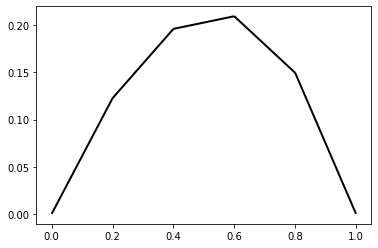

In [23]:
# Plotting the solution
plot(u)
plt.show()

# 2D Burger

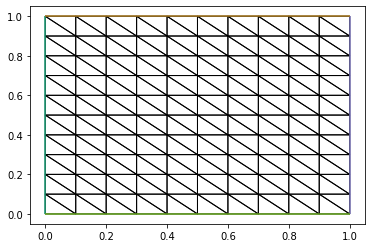

In [24]:
mesh = UnitSquareMesh(10, 10)
triplot(mesh)
plt.show()

In [25]:
V = FunctionSpace(mesh, "CG", 1)

In [26]:
u = TrialFunction(V)
v = TestFunction(V)

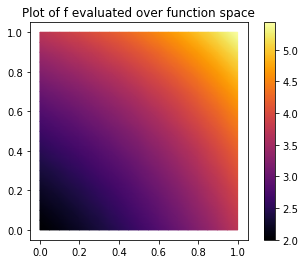

In [36]:
f = Function(V)
x, y = SpatialCoordinate(mesh)
# f.interpolate((1+8*pi*pi)*cos(x*pi*2)*cos(y*pi*2))
f.project(exp(x) + exp(y))
fig, axes = plt.subplots()
axes.set_title('Plot of f evaluated over function space')
contours = tripcolor(f, axes=axes, cmap="inferno")
axes.set_aspect("equal")
fig.colorbar(contours)
plt.show()

In [39]:
a = (inner(grad(u), grad(v)) + inner(u, v)) * dx
L = f * v * dx

In [40]:
u = Function(V)
# solve(a == L, u, solver_parameters={'ksp_type': 'cg', 'pc_type': 'none'})
solve(a, u, L)

TypeError: Provided operator is a 'Form', not a MatrixBase

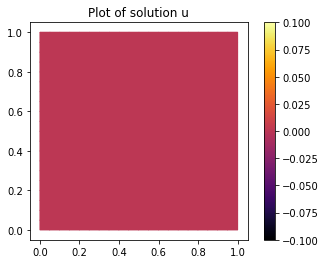

In [41]:
fig, axes = plt.subplots()
axes.set_title('Plot of solution u')
contours = tripcolor(u, axes=axes, cmap="inferno")
axes.set_aspect("equal")
fig.colorbar(contours)
plt.show()

In [42]:
f.interpolate(cos(x*pi*2)*cos(y*pi*2))
# error = norms.errornorm(u, f, mesh=mesh)

In [43]:
# print(error)

0.46871021990926337
